# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Задача</b> — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Научиться определять рыночную стоимость объектов недвижимости. 

<b>Описание данных</b>

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head(10))
data.info()

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

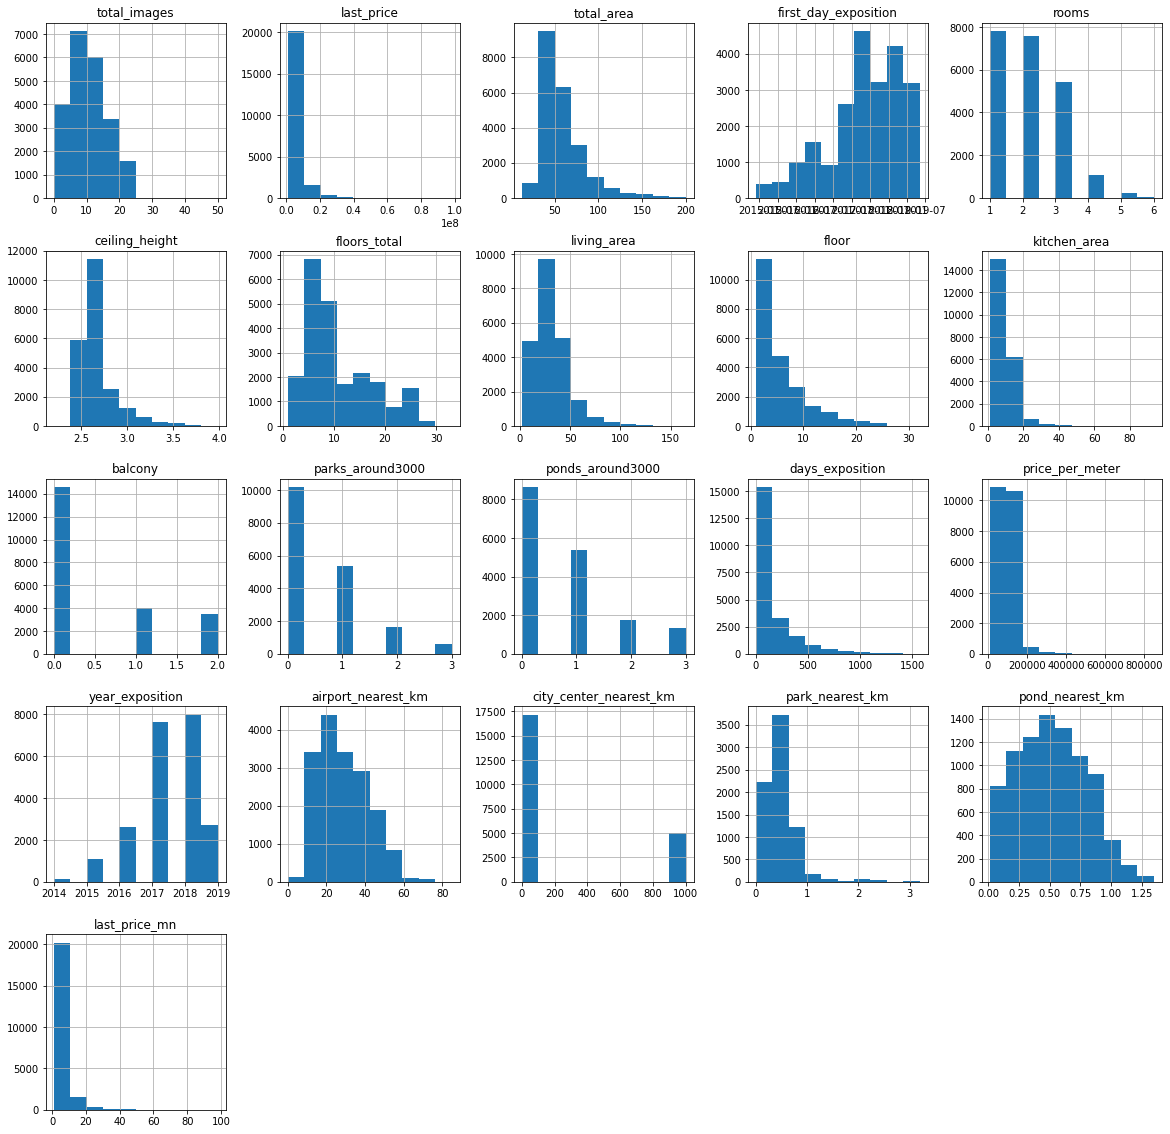

In [75]:
#построим гистограмму для всех столбцов
data.hist(figsize=(20, 20));

### Предобработка данных

In [4]:
data.isna().sum().sort_values()/data.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

In [5]:
data['last_price'] = data['last_price'].astype('int')
#переведем тип данных в int

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 
#переведем тип данных в формат даты

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

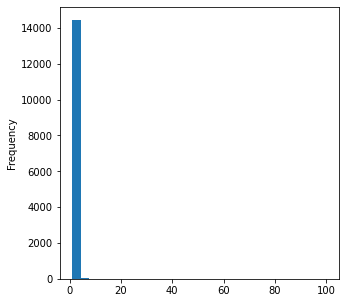

In [7]:
#посмотрим на высоту потолков
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, figsize=(5,5))
data['ceiling_height'].describe() 

In [8]:
#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [9]:
print(data['locality_name'].nunique()) 
#узнаем кол-во уникальных значений в столбце 'locality_name'
print(data['locality_name'].unique()) 
#в столбце с данными есть по крайней мере одна проблема - в том, что некоторые топонимы пишутся и через 'е', и через 'ё'

364
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
print(data['locality_name'].nunique())
#удалили 34 дубликата в топонимах

330


In [11]:
data['locality_name'].isna().sum()
#узнаем кол-во строк, где город не указан
data = data.dropna(subset=['locality_name'])
#удалим строки, где город не указан, т.к. такие объявления бесполезны при поиске квартиры
   

In [12]:
#строк, где город не указан, больше нет
data['locality_name'].isna().sum()

0

In [13]:
#переименуем столбец, чтобы не было больших букв в названиях столбцов
data.rename(columns = {'cityCenters_nearest' : 'city_center_nearest'}, inplace = True)

In [14]:
#Заменим высоты потолков медианой соответствующего района
for locality_name in data['locality_name'].unique():
    med = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = med

In [15]:
#Заменим кол-во прилегающих парков медианой соответствующего района
for locality_name in data['locality_name'].unique():
    med = data.loc[data['locality_name'] == locality_name, 'parks_around3000'].median()
    data.loc[(data['parks_around3000'].isna()) & (data['locality_name'] == locality_name), 'parks_around3000'] = med

In [16]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
print(data['ceiling_height'].isna().sum())

0


In [17]:
data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()
print(data['living_area'].isna().sum())

0


In [18]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()
print(data['kitchen_area'].isna().sum())

0


In [19]:
#В столбце 'is_apartment' очень много пропусков, видимо это поле было добавлено недавно. Заменим отсутствующие значения на False.
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].isna().sum())

0


In [20]:
#В столбце с балконами пропущенные значения заменим на ноль.
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())

0


In [21]:
#еще раз посмотрим данные
print(data)
data.info()

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20    13000000      108.00           2019-03-07      3   
1                 7     3350000       40.40           2018-12-04      1   
2                10     5196000       56.00           2015-08-20      2   
3                 0    64900000      159.00           2015-07-24      3   
4                 2    10000000      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9     9700000      133.81           2017-03-21      3   
23695            14     3100000       59.00           2018-01-15      3   
23696            18     2500000       56.70           2018-02-11      2   
23697            13    11475000       76.75           2017-03-28      2   
23698             4     1350000       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70

Аномалии

В данных можно заметить аномалии: минимальная цена квартиры - 12 тыс., в столбце о высоте потолков есть значения 0 и 100м, есть квартира с 0 комнат, есть дом высотой в 60 этажей.

Удалим из таблицы строки с визуально аномальными значениями

count    23650.000000
mean         2.732203
std          1.002602
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

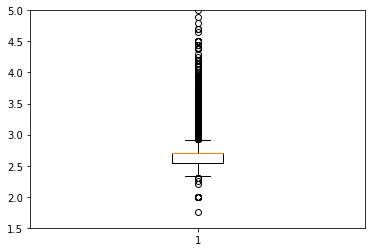

In [22]:
#построим диграмму размаха для высотыпотолков
import matplotlib.pyplot as plt
plt.boxplot(data['ceiling_height'])
plt.ylim(1.5,5)
data['ceiling_height'].describe()

In [23]:
#узнаем пределы нормальных значений для столбца с высотой потолков
ceiling_up = data['ceiling_height'].quantile(0.75) + (data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.25))*1.5
ceiling_down = data['ceiling_height'].quantile(0.25) - (data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.25))*1.5
print(ceiling_up)
print(ceiling_down)
data['ceiling_height'].describe()
print(len(data) - len(data.query('(ceiling_height > @ceiling_down) & (ceiling_height < @ceiling_up)')))

2.9250000000000007
2.3249999999999993
2737


Нормальные значения высоты потолков лежат от 2.32 до 2.92, следуя правилам математики, нужно удалить все значения за этими пределами.
    
Но я бы расширил границы нормальных значений, т.к. потолки в 2.3, 3 и 3.5 метров вполне норма, а малый разброс нормальных значений видимо получился из-за очень выосокой концентрации стандартных потолков.
    
К тому же удаление значений вне границ уменьшит выборку на 2737 строки - больше 10%

In [24]:
#удалим строки с высотой потолков от 2 до 4 метров
data = data.query('(ceiling_height < 4) & (ceiling_height > 2)')
print(len(data))

23522


(1.0, 20.0)

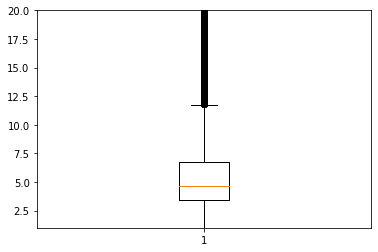

In [25]:
#построим диграмму размаха для цены объекта
plt.boxplot(data['last_price']/1000000)
plt.ylim(1,20)

In [26]:
price_up = data['last_price'].quantile(0.75) + (data['last_price'].quantile(0.75) - data['last_price'].quantile(0.25))*1.5
print(len(data.query('last_price > @price_up')))

2032


Диаграмма размаха показывает, что верхняя граница нормальных значений - около 12 млн.

Опять же, видимо это из-за высокой концентрации в объявлениях стандартных квартир в спальных районах.

Но если мы выбросим из выборки все квартиры дороже 12 млн, то мы концентрируемся только на анализе квартир эконом и комфорт ценовых категорий.

Из анализа тогда пропадает дорогое жилье, бизнес-класс и т.д., это может привести к потере некоторых выводов, например, думаю, изменятся выводы по влиянию удаленности квартиры от центра на ее стоимость.

К тому же, если удалить данные вне верхней границы нормальных значений, пропадет еще 2032 строки, тоже почти 10% вбыорки.


In [27]:
#удалим строки с ценой объекта ниже 1 млн и выше 100 млн
data = data.query('(last_price < 100000000) & (last_price > 1000000)')
print(len(data))

23245


count    23245.000000
mean         2.066036
std          1.068342
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


(1.0, 10.0)

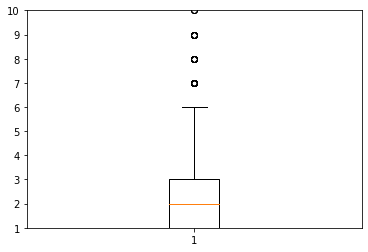

In [28]:
print(data['rooms'].describe())
#построим диграмму размаха для цены объекта
plt.boxplot(data['rooms'])
plt.ylim(1,10)

In [29]:
#Верхняя граница диапазона нормальных значений для комант равна 6
#удалим из данных строки с количеством комант 0 и более 6
data = data.query('(rooms != 0) & (rooms <= 6)')
print(len(data))

22972


count    22972.000000
mean        59.473937
std         30.325752
min         12.000000
25%         40.200000
50%         52.000000
75%         69.600000
max        494.100000
Name: total_area, dtype: float64


(10.0, 200.0)

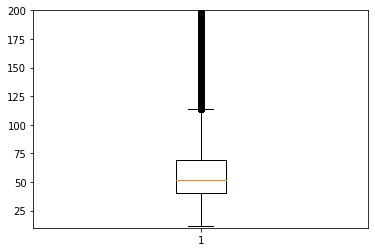

In [30]:
print(data['total_area'].describe())
#построим диаграмму размаха для столбца с общей площадью
plt.boxplot(data['total_area'])
plt.ylim(10,200)

In [31]:
total_area_up = data['total_area'].quantile(0.75) + (data['total_area'].quantile(0.75) - data['total_area'].quantile(0.25))*1.5
print(total_area_up)
print(len(data.query('total_area > @total_area_up')))

113.69999999999999
1129


Верхнее значение диапазона нормальных данных для общей площади - 113 м, но опять же квартиры большей площади - вполне норма.

In [32]:
#удалим из данных квартиры с площадью более 200 метров.
data = data.query('(total_area >= 12) & (total_area <= 200)')
print(len(data))

22848


count    22848.000000
mean         0.593881
std          0.962432
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5423e93ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f542311f8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5423e93310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5423384340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5423eb3970>],
 'means': []}

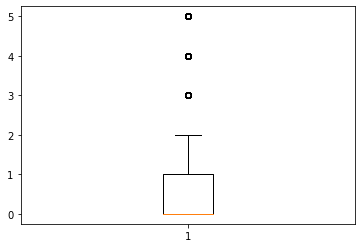

In [33]:
#постром диаграмму размаха для столбца с балконами
print(data['balcony'].describe())
plt.boxplot(data['balcony']);

In [34]:
#удалим из таблицы строки с количеством балконов больше 2
data = data.query('balcony <= 2')
print(len(data))

22293


22212


(1.0, 35.0)

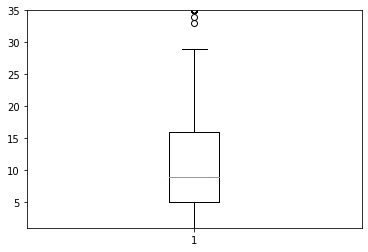

In [35]:
#построим диаграмму размаха для количества этажей в доме
data['floors_total'] = data['floors_total'].fillna(0).astype('int')
data = data.query('floors_total != 0')
print(len(data))
plt.boxplot(data['floors_total'])
plt.ylim(1,35)

In [36]:
#найдем значение верхней границы диапазона нормальных значени
floors_total_up = data['floors_total'].quantile(0.75) + (data['floors_total'].quantile(0.75) - data['floors_total'].quantile(0.25))*1.5
print(floors_total_up)
#33 похоже на правду - самый высокий жк в Санкт-Петерьурге - 37 этажей

32.5


In [37]:
#удалим строки с домами выше 33 этажей
data = data.query('floors_total <= 33')
print(len(data))

22185


Ниже проверим наличие явных дубликатов

In [38]:
#проверим таблицу на наличие явных дубликатов - их нет
data.duplicated().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

In [39]:
#добавим цену квадратного метра
data['price_per_meter'] = data['last_price']/data['total_area']
data['price_per_meter'] = data['price_per_meter'].astype('int')

In [40]:
#добавим столбцы c днем, месяцем и годом
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

In [41]:
#распределим на категории этажи и добавим соответствующий столбец
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)

In [42]:
#переведем в новых столбцах все расстояния в км
data['airport_nearest_km'] = data['airports_nearest'] / 1000
data['city_center_nearest_km'] = data['city_center_nearest'] / 1000
data['park_nearest_km'] = data['parks_nearest'] / 1000
data['pond_nearest_km'] = data['ponds_nearest'] / 1000

In [43]:
#удалим старые столбцы с расстояниями
del data['airports_nearest']
del data['city_center_nearest']
del data['parks_nearest']
del data['ponds_nearest']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_category,airport_nearest_km,city_center_nearest_km,park_nearest_km,pond_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,120370,Thursday,March,2019,другой,18.863,16.028,0.482,0.755
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,81,82920,Tuesday,December,2018,первый,12.817,18.603,NaN,NaN
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,558,92785,Thursday,August,2015,другой,21.741,13.933,0.090,0.574
3,0,64900000,159.0,2015-07-24,3,2.70,14,30.0,9,False,...,424,408176,Friday,July,2015,другой,28.098,6.800,0.084,0.234
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121,100000,Tuesday,June,2018,другой,31.856,8.098,0.112,0.048


### Проведите исследовательский анализ данных

In [44]:
#добавим столбец с ценой объекта в миллионах
data['last_price_mn'] = data['last_price']/1000000

#изучим информацию о столбцах
data[['total_area',
      'living_area',
      'kitchen_area',
      'last_price_mn',
      'rooms',
      'ceiling_height',
      'floor',
      'floor_category',
      'floors_total']].describe()
      
     

,total_area,living_area,kitchen_area,last_price_mn,rooms,ceiling_height,floor,floors_total
count,22185.000000,22185.000000,22185.000000,22185.000000,22185.000000,22185.000000,22185.000000,22185.000000
mean,57.860324,32.767019,10.209094,5.956861,2.032545,2.694478,5.854632,10.681406
std,25.926372,16.414447,5.021974,5.262641,0.965939,0.196384,4.826386,6.507230
min,12.000000,2.000000,1.300000,1.010000,1.000000,2.200000,1.000000,1.000000
25%,40.000000,19.000000,7.200000,3.450000,1.000000,2.550000,2.000000,5.000000
50%,51.300000,30.000000,9.100000,4.600000,2.000000,2.700000,4.000000,9.000000
75%,68.000000,40.400000,11.200000,6.600000,3.000000,2.700000,8.000000,16.000000
max,200.000000,164.700000,93.200000,98.000000,6.000000,3.980000,32.000000,33.000000


In [45]:
#изучим информацию о столбцах
data[['airport_nearest_km',
     'city_center_nearest_km',
      'park_nearest_km',
      'pond_nearest_km']].describe()

,airport_nearest_km,city_center_nearest_km,park_nearest_km,pond_nearest_km
count,17132.000000,17152.000000,7564.000000,8501.000000
mean,28.842190,14.297881,0.491010,0.522729
std,12.694722,8.613686,0.343362,0.277193
min,0.000000,0.181000,0.001000,0.013000
25%,18.476500,9.436000,0.287750,0.302000
50%,26.838500,13.152000,0.454000,0.507000
75%,37.374250,16.309000,0.613000,0.733000
max,84.869000,65.968000,3.190000,1.344000


In [46]:
data['floor_category'].describe()
print(data[data['floor_category'] == 'первый']['floor_category'].count()/len(data['floor_category']))
print(data[data['floor_category'] == 'последний']['floor_category'].count()/len(data['floor_category']))

0.12418300653594772
0.1382465629930133


In [47]:
#посмотрим квартиры с каким количеством комнат встречаются наиболее часто
data.groupby('rooms')['rooms'].count()

rooms
1    7817
2    7581
3    5406
4    1070
5     251
6      60
Name: rooms, dtype: int64

In [48]:
#посмотрим квартиры с какой общей площадью встречаются наиболее часто
data.groupby('total_area')['total_area'].count().sort_values(ascending = False)

total_area
45.00    402
42.00    370
60.00    334
44.00    333
31.00    329
        ... 
37.38      1
75.03      1
37.32      1
37.31      1
12.00      1
Name: total_area, Length: 1928, dtype: int64

<AxesSubplot:ylabel='Frequency'>

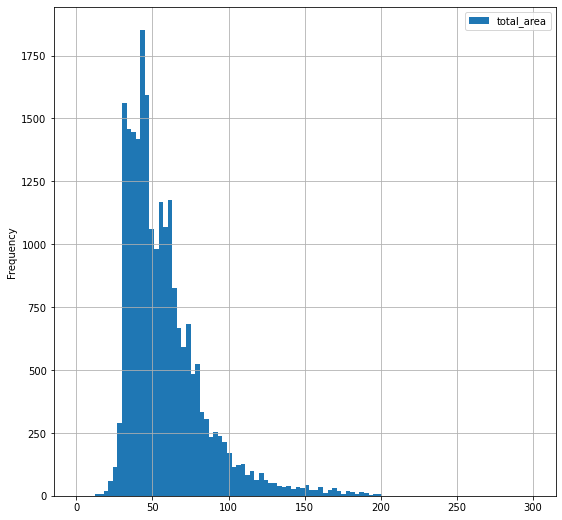

In [49]:
data.plot(y='total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range=(0,300))

<AxesSubplot:ylabel='Frequency'>

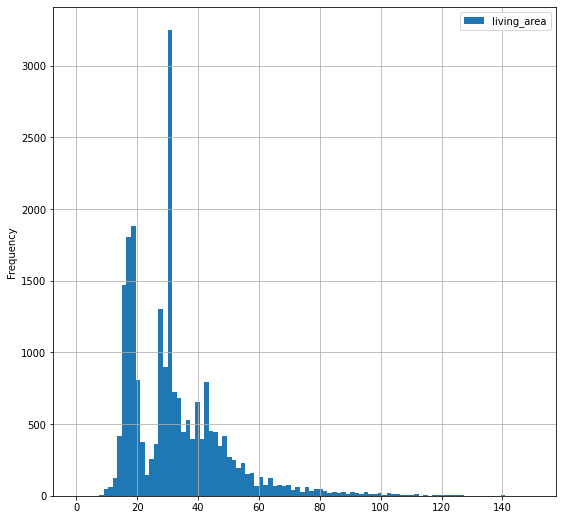

In [50]:
data.plot(y='living_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,150))

<AxesSubplot:ylabel='Frequency'>

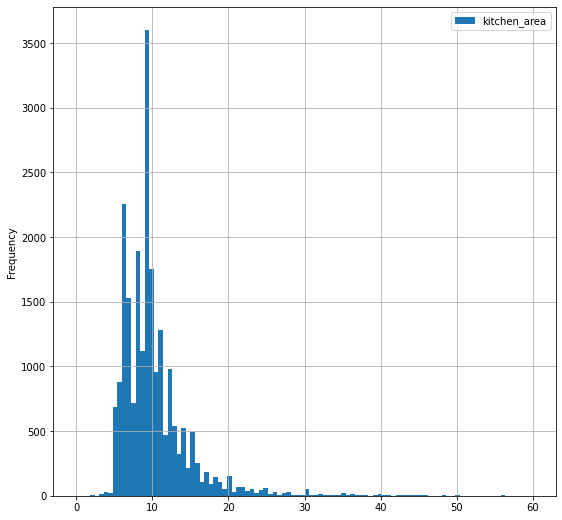

In [51]:
data.plot(y='kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,60))

<AxesSubplot:ylabel='Frequency'>

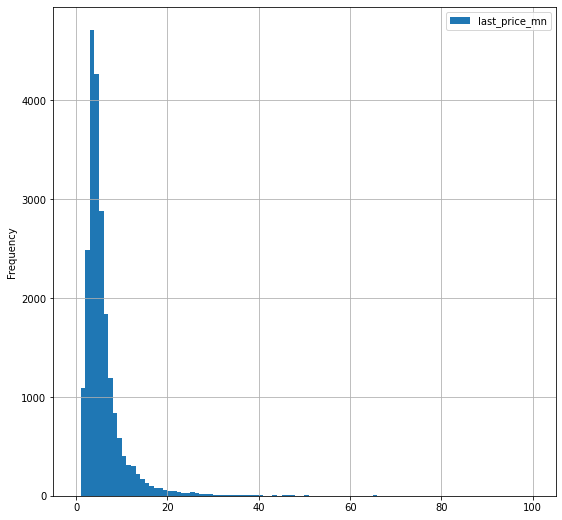

In [52]:
data.plot(y='last_price_mn', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,100))

1. Общая площадь квартир начиается от значения в 12м2, среднее значение - 58м2, медиана - 51м2.
2. Средняя цена на квартиру - 6 млн, медиана 4,6 млн.
3. Средняя высота потолков в объектах, выставленных на продажу, - 2.7м.
4. При просмотре гистограмм с характеристиками площадей квартир (общая, жилая, кухонная) можно заметить на них по несколько пиков. Скорее всего, это связано с тем, что на рынке все еще большое количество квартир из домов с типовой советской застройкой, и в данных много значений площадей, соответствующих харарктеристикам из квартир типовой застройки. Возможно, на эти значения и приходятся пики.
5. В среднем количество этажей в домах, где продаются квартиры - 10, больше всего квартир продаются на 1 и 2 этажах.
    
6. На первом этаже расположено 12% от всех продаваемых объектов, на последнем этаже - 14%.

7. В среднем квартиры находятся на удалении от центра Санкт-Петербурга в 14 км, самая удаленная от центра города квартира расположена в 66 км.
    
8. В среднем квартиры находятся на удалении от аэропарта в 28 км, самая удаленная от аэропорта квартира расположена в 85 км.
    
9. В среднем ближайший парк находится от продаваемого объекта в 500м, наиболее удавленная от ближайшего парка квартира - в 3.2 км от него. 

10. В среднем ближайший водоем находится от продаваемого объекта в 500м, наиболее удавленная от ближайшего водоема квартира - в 1.3 км от него. 
    

In [53]:
#ознакомимся со средним значением и медианой
data[data['days_exposition']!=0]['days_exposition'].describe()

count    19285.000000
mean       180.080114
std        219.137983
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1572.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

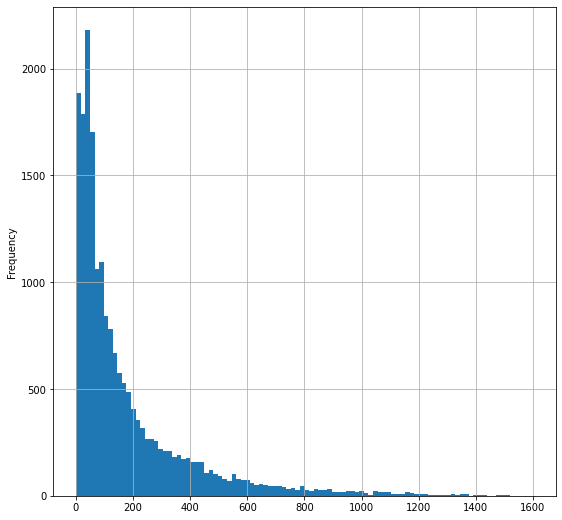

In [54]:
#построим гистрограмму для количества дней, которое было опубликовано объявление
data['days_exposition'].plot(kind='hist', y='days_exposition', grid=True, figsize=(9,9), bins=100, range=(1,1600))

<AxesSubplot:ylabel='Frequency'>

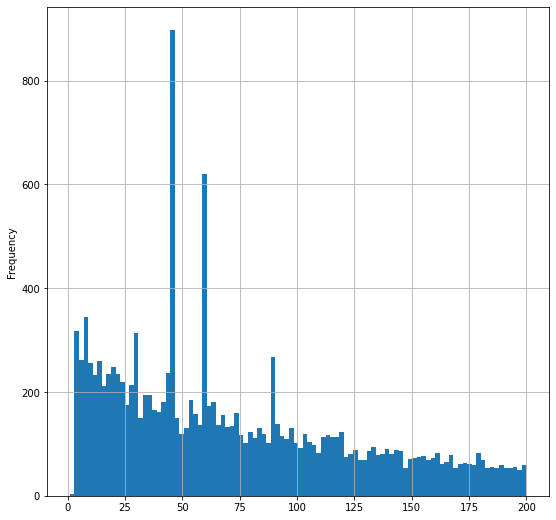

In [55]:
#для лучшей видимости сделаем гистограмму с ограничением по кол-ву дней публикации в 200
#из данной гистограммы заметны несколько явных пиков
data['days_exposition'].plot(kind='hist', y='days_exposition', grid=True, figsize=(9,9), bins=100, range=(1,200))

In [56]:
#вызов метода подтверждает, что на предыдущей гистограмме мы видим пики в значениях 7, 30, 45, 60, 90 дней
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45      814
60      521
7       214
30      199
90      175
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1123, dtype: int64

(1.0, 1000.0)

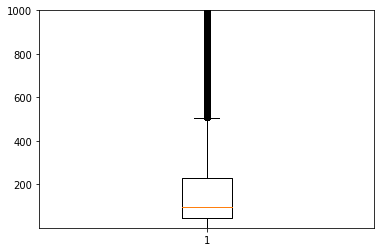

In [57]:
#ориентировочная граница нормального размаха - 500
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

1. Среднее значение количества дней публикации объявления - 180, медиана - 95.
2. Межквартильный размах - от 45 до 231, ориентировочная граница нормального размаха - 500. Т.е. нормальные значения лежат от 1 до 500.
3. Гистограмма со значениями кол-ва дней публикации объявления до 200 продемонстрировала пики в значениях 7, 30, 45, 60, 90 дней.
4. По всей видимости пики в данных значениях связаны с особенностями размещения объявлений на конкретной площадке. Возможно, на момент сбора данных на Яндекс.Недвижимости, объявления удалялись как неактуальные именно по истечении данных сроков (возможно, количество дней варьировалось от количества комнат в кв. и платности/бесплатности объявления).
5. Хотя квартиры действительно могли продаваться через 7, 30, 45, 60, 90 дней после публикации, для данных сроков долю снятия объявлений по факту продажи квартиры, а не по факту утери объявлением актуальности установить нельзя, поэтому нужно очистить данные от этих значений.

In [58]:
#сделаем срез очищенных данных и сохраним их в новую переменную
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7')

(1.0, 1000.0)

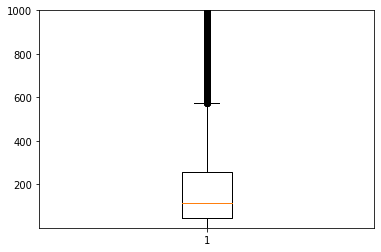

In [59]:
#построим новую диаграмму размаха
plt.boxplot(good_data[good_data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

<AxesSubplot:ylabel='Frequency'>

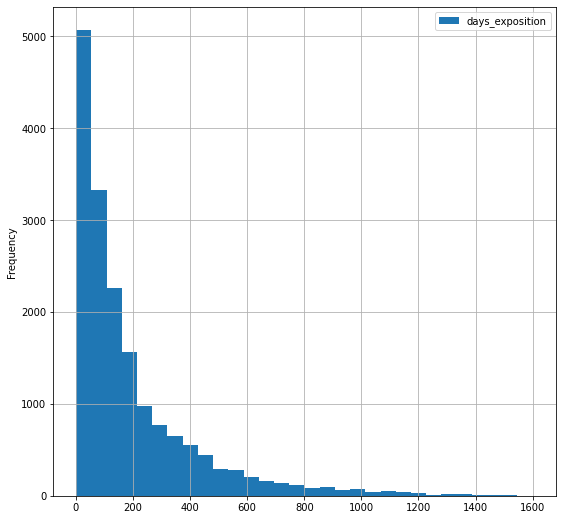

In [60]:
#построим новую гистограмму
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, figsize=(9,9), range = (1,1600))

<AxesSubplot:ylabel='Frequency'>

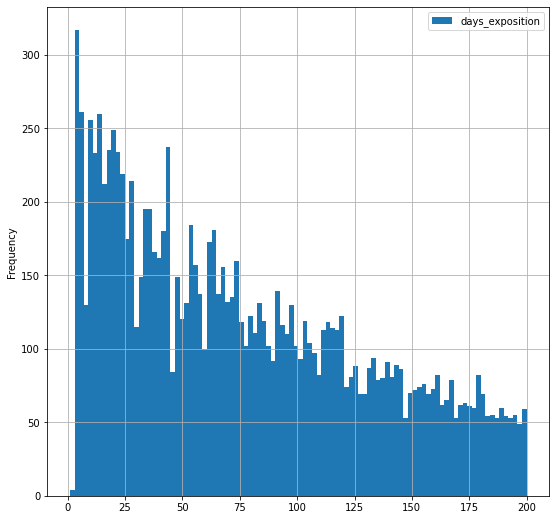

In [61]:
#для наглядности увеличим количество корзин
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200), figsize = (9,9))

In [62]:
#посмотрим на характеристики отфильтрованных данных
good_data[good_data['days_exposition']!=0]['days_exposition'].describe()

count    17362.000000
mean       194.778079
std        226.112925
min          1.000000
25%         44.000000
50%        113.000000
75%        256.750000
max       1572.000000
Name: days_exposition, dtype: float64

1. После очистки данных от аномальных значений в столбце 'days_exposition' медиана и среднее значение выросли до 114 и 195 вместо 95 и 180 до очистки.
2. Нормальные значения располагаются в диапазоне от 1 до 600 вместо от 1 до 500 ранее.

0.7291498919875175

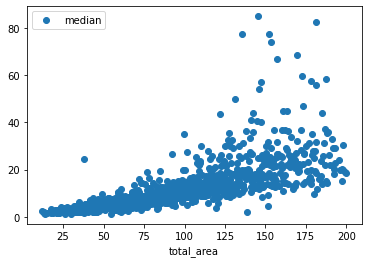

In [63]:
#Изучим зависимость стоимости объекта от общей площади
pivot_table_price_to_total_area = data.pivot_table(index = 'total_area', values = 'last_price_mn', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_to_total_area.columns = ['mean', 'count', 'median']
pivot_table_price_to_total_area.plot(y = 'median', style = 'o')

pivot_table_price_to_total_area.sort_values('median', ascending=False)
data['total_area'].corr(data['last_price_mn'])


Вывод: стоимость объекта положительно и значительно зависит от общей площади (коэф. корр. 0.65), что очевидно.

0.5745836815944704

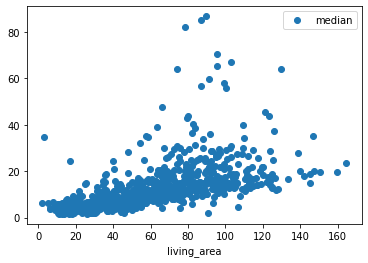

In [64]:
#Изучим зависимость стоимости объекта от жилой площади
pivot_table_price_to_living_area = data.pivot_table(index = 'living_area', values = 'last_price_mn', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_to_living_area.columns = ['mean', 'count', 'median']
pivot_table_price_to_living_area.plot(y = 'median', style = 'o')

pivot_table_price_to_living_area.sort_values('median', ascending=False)
data['living_area'].corr(data['last_price_mn'])

Вывод: стоимость объекта положительно зависит от жилой площади (коэф. корр. 0.57), но в меньшей степени, чем от общей площади квартиры.

0.534681764030833

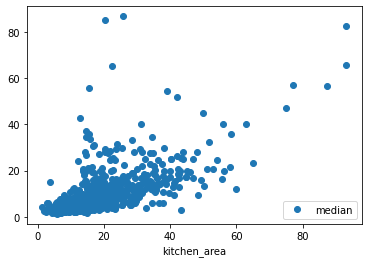

In [65]:
#Изучим зависимость стоимости объекта от площади кухни
pivot_table_price_to_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price_mn', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_to_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_price_to_kitchen_area.plot(y = 'median', style = 'o')

pivot_table_price_to_kitchen_area.sort_values('median', ascending=False)
data['kitchen_area'].corr(data['last_price_mn'])

Вывод: стоимость объекта положительно зависит от площади кухни, но зависимость слабее (коэф. корр 0.52), чем от общей площади или от жилой площади.

0.42735685499804305

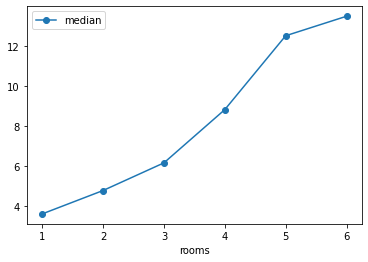

In [66]:
#Изучим зависимость стоимости объекта от количества комнат
pivot_table_price_to_rooms = data.pivot_table(index = 'rooms', values = 'last_price_mn', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_to_rooms.columns = ['mean', 'count', 'median']
pivot_table_price_to_rooms.query('count >= 59').plot(y = 'median', style = 'o-')

pivot_table_price_to_rooms.query('count >= 59').sort_values('median', ascending=False)
data['rooms'].corr(data.query('rooms <= 7')['last_price_mn'])

Вывод: зависимость между стомость объекта и количеством комнат есть, но слабая (коэф. корр. 0.35)

                    mean  count  median
floor_category                         
другой          6.216726  16363    4.80
первый          4.670037   2755    3.95
последний       5.726352   3067    4.30


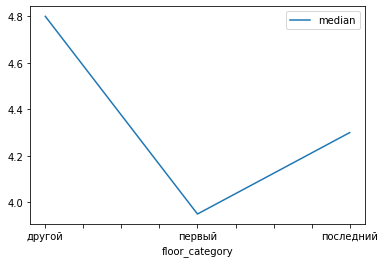

In [67]:
#Изучим зависимость стоимости объекта от категории этажа
pivot_table_price_to_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price_mn', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_to_floor_category.columns = ['mean', 'count', 'median']
pivot_table_price_to_floor_category.plot(y = 'median')
print(pivot_table_price_to_floor_category)

Вывод: 
1.Коэффициент корреляции мы найти не можем, т.к. в столбце 'floor_category' не числовые значения.
2.Медианное значение стоимости объекта, находящегося на первом этаже на 0.4 млн ниже, чем объекта, находящегося на последнем этаже и на 0.95 млн ниже, чем у объекта на этаже со 2-го до предпоследнего.
3.Очевидно, в среднем квартиры на первом этаже самые дешевые, на последнем - дороже, на этажах со 2-го до предпоследнего - наиболее дорогие.
    

                        mean  count   median
weekday_exposition                          
Tuesday             5.959682   3941  4.70000
Wednesday           5.963357   3721  4.65841
Monday              6.009340   3402  4.60000
Thursday            6.125963   4008  4.60000
Friday              5.847669   3738  4.55000
Saturday            5.878388   1794  4.55000
Sunday              5.740136   1581  4.50000


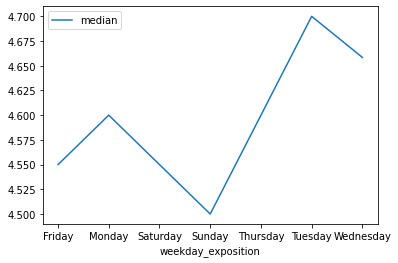

In [68]:
#Изучим зависимость стоимости объекта от дня недели размещения объявления
pivot_table_price_to_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price_mn', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_to_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_price_to_weekday_exposition.plot(y = 'median')
print(pivot_table_price_to_weekday_exposition.sort_values('median', ascending = False))

Вывод:
1. Наименьшее число объявлений размещается по выходным, что очевидно, видимо люди предпочитают не откладывать публикации объявлений на выходные, а всю свою активность концентрируют в будние дни.
2. Наименьшее медианное значение стоимости объектов у объявлений, опубликованных в выходные.
3. Обясняя пункт 2 могу нафантазировать такую теорию: среди объявлений, опубликованных в каждый из будних дней есть доля объявлений, опубликованных через риэлторов. Риэлторы в основном работают по будням, поэтому, думаю, в выходные доля таких объявлений очень мала. Цена объекта в таких объявлениях может быть в среднем выше т.к. в целом к риэлторам обращаются люди с более дорогими объектами, второй вариант - люди, обратившиеся к риэлторам, закладывают комиссию риэтора в цену объекта. 

                      mean  count  median
month_exposition                         
April             5.903855   2213   4.750
September         6.133038   1852   4.700
December          6.191481   1544   4.690
November          5.952574   2199   4.650
March             5.832704   2430   4.645
February          6.057375   2485   4.630
January           5.969882   1390   4.600
July              5.937200   1585   4.600
August            5.981363   1633   4.550
October           5.742126   1998   4.550
May               6.021831   1198   4.500
June              5.844905   1658   4.400


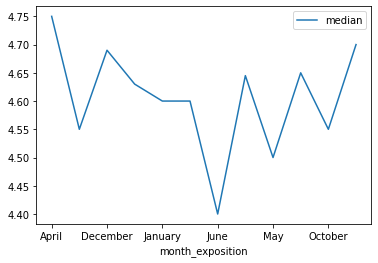

In [69]:
#Изучим зависимость стоимости объекта от месяца размещения объявления
pivot_table_price_to_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price_mn', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_to_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_price_to_month_exposition.plot(y = 'median')
print(pivot_table_price_to_month_exposition.sort_values('median', ascending = False))

Вывод:
1.Медианное значение стоимости объекта выше всего для апреля. Как объсняют статьи на эту тему, после затишья на рынке в январе (после праздников) активность на рынке начинает набирать обороты и достигает пика к апрелю, соответственно, и цены тоже. Видимо также роль играет то, что летом, после покупки весной, можно успеть сделать ремонт по хорошей погоде. 
2. Спад в мае связан с долгими праздниками, а летом активность на рынке низкая из-за отпускного сезона. Осенью активность на рынке опять восстанавливается, что объясняет нахождение сентября, ноября и декабря по медианной цене. Не очень понятно, почему тогда октябрь внизу (?)

                      mean  count  median
year_exposition                          
2014             10.995194    127    7.50
2015              7.318134   1099    5.20
2019              6.313691   2697    5.00
2018              5.656153   7981    4.55
2016              6.101916   2627    4.50
2017              5.815838   7654    4.50


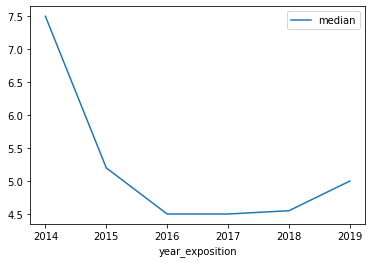

In [70]:
#Изучим зависимость стоимости объекта от года размещения объявления
pivot_table_price_to_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price_mn', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_to_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_price_to_year_exposition.plot(y = 'median')
print(pivot_table_price_to_year_exposition.sort_values('median', ascending = False))

Вывод:
1. Выборка по 2014 году маленькая в сравнении с остальными годами, поэтому по этому году я бы выводы не делал.
2. В целом динамика цены на квартиру по годам соответствует динамике российской экономики в эти годы. Видимо падение цен на энергоносители, ослабление рубля и санкции 2014-го года сразу стали отражаться на рынке недвижимости. Далее после затяжного падения в 2017-2018 гг опять начался скромный рост.

                      mean  count  median
year_exposition                          
2014             82.544567    127   75.50
2015             66.313485   1099   59.70
2016             59.569928   2627   53.00
2017             57.789673   7654   51.00
2019             56.811628   2697   51.00
2018             56.162922   7981   50.09


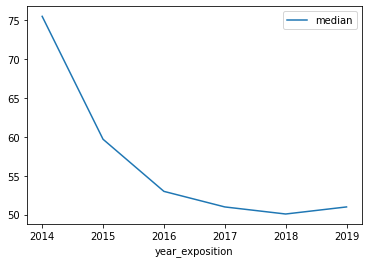

In [71]:
#Изучим зависимость общей площади объекта от года размещения объявления
pivot_table_total_area_to_year_exposition = data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area_to_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_total_area_to_year_exposition.plot(y = 'median')
print(pivot_table_total_area_to_year_exposition.sort_values('median', ascending = False))

                          mean  count  median
year_exposition                              
2014             122053.196850    127  106468
2019             107001.718205   2697  103606
2018              97822.656183   7981   95860
2015             102146.282075   1099   92727
2017              95989.985890   7654   92237
2016              97122.259231   2627   91632


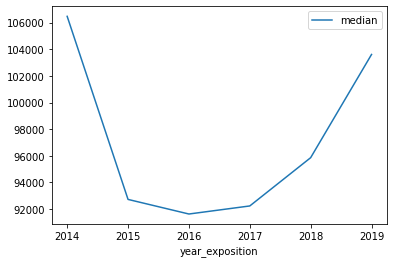

In [72]:
#Изучим зависимость цена на м2 от года размещения объявления
pivot_table_price_per_meter_to_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_price_per_meter_to_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_price_per_meter_to_year_exposition.plot(y = 'median')
print(pivot_table_price_per_meter_to_year_exposition.sort_values('median', ascending = False))

Динамика изменения стоимости квартир по годам объясняется динамикой изменения цены на м2 и динамикой изменения средней/медианной площади квартиры.
    
1. Падение средней цены объекта в 14 году объясняется и падением цены за метр и падением средней площади.
2. Падение средней цены объекта в 15 году объясняется главным образом падением средней площади и незначительно падением цены.
3. В 16 году средняя цена за объект не менялась: падение средней площади компенсировалось ростом цены м2.
4. В 17 году был небольшой рост цены за объект: цена м2 росла большИм темпом, чем падала средняя площадь обекта.
5. В 18 году рост средней цены объекта объясняется и ростом средней площади, и, в бОльшей степени, ростом цены м2.

То есть с 14 года наблюдался тренд на уменьшение средней площади квартир на продажу, скромный рост возобновился только в 18 году.

Возможно, это объясняется тем, что маркетологи застройщиков быстро среагировали на кризис, и застройщики стали продавать меньшие по площади квартиры, чтобы компенсировать рост цен на м2 (как девяток яиц), и это имело эффект на весь рынок, не только на первичный. Как раз тогда стало популярным слово апартамент.

Тажке уменьшение средней площади может быть связано с тем, что в центре Санкт-Петербурга появился тренд на перестройку старых коммуналок в апартаменты с площадью наподобие 12м2, как минимальное значение в столбце с общей площадью. 

In [73]:
#узнаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
pivot_table_locality = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count','mean'])
pivot_table_locality.columns = ['count','mean']
print(pivot_table_locality.sort_values('count', ascending=False).head(10))
#самая высокая стоимость из топ-10 по кол-ву объявлений
print(pivot_table_locality[pivot_table_locality['mean'] == pivot_table_locality.sort_values('count', ascending=False).head(10)['mean'].max()])
#самая низкая стоимость из топ-10 по кол-ву объявлений
print(pivot_table_locality[pivot_table_locality['mean'] == pivot_table_locality.sort_values('count', ascending=False).head(10)['mean'].min()])

                   count           mean
locality_name                          
Санкт-Петербург    14827  112710.754772
поселок Мурино       511   85149.839530
поселок Шушары       425   78473.195294
Всеволожск           372   68695.798387
Пушкин               351  102325.378917
Колпино              326   75172.368098
поселок Парголово    322   90448.000000
Гатчина              293   68904.491468
деревня Кудрово      278   92540.363309
Выборг               227   58927.828194
                 count           mean
locality_name                        
Санкт-Петербург  14827  112710.754772
               count          mean
locality_name                     
Выборг           227  58927.828194


Вывод: из топ-10 населенных пунктов по кол-ву размещенных объявлений самая дорогая недвижимость в Санкт-Петербурге, самая дешевая - Выборге, т.к. он наиболее удаленный от Санкт-Петербурга среди остальных.

                        price_per_meter
city_center_nearest_km                 
0                         166762.666667
1                         142717.304348
2                         133796.145985
3                         123414.891393
4                         135058.585455
5                         142090.303597
6                         147094.752860
7                         136906.947917
8                         119313.461538
9                         110109.638298
10                        111145.651429
11                        106490.052006
12                        107987.946318
13                        106544.895410
14                        104570.263303
15                        101963.187029
16                         99888.257974
17                         94386.813861
18                         94403.654545
19                         95452.150000
20                        102667.562500
21                         90964.957672
22                         88810.305344


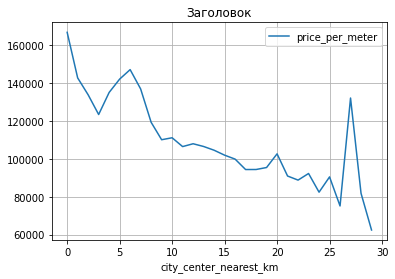

In [74]:
#изучим зависимость цены объекта в Санкт-Петербурге от его удаленности от центра города
data['city_center_nearest_km'] = data['city_center_nearest_km'].fillna(1000).astype(int)
pivot_table_center_km_to_price = data.query('locality_name == "Санкт-Петербург" and city_center_nearest_km != 1000').pivot_table(index='city_center_nearest_km', values='price_per_meter', aggfunc='mean')
print(pivot_table_center_km_to_price)
pivot_table_center_km_to_price.plot(title = 'Заголовок', grid = True)
plt.show()

Вывод: 
1. До значения удаленности от центра в 3 км видна очевидная взаимосвязь между удаленностьью о центра и ценой за м2 (чем ближе, тем дороже)
2. При росте удаленности от центра в диапазоне от 3 до 5 км виден рост цены м2, что может показаться парадоксальным. Но, скорее всего, дело в том, что в Санкт-Петербурге сохранилось огромное полотно исторической застройки, как раз примерно в диаметре 3-4 км от центра. Чем ближе эта застройка к центру, тем больше у нее шансов оставаться в хорошем состоянии. К окраинам исторической застройки, которые уже преимущественно сильно обветшали, примыкают новые районы, и выходит, что м2 на окраине исторической застройки стоит дешевле, чем в новых районах, примыкающих к старой застройке Петербурга. + окраины старой застройки во многих местах расположены около территорий старых промышленных предприятий, индустриальных зон и вокруг железных дорог, что также снижает стоимость м2 в них.
3. После роста на диапазоне 3-5 км от центра, обусловленного сменой застройки с обветшалой исторической на новую, с удалением от центра цена на м2 падает.
4. Скачки в цене на отметке в 20 км и примерно 27 км, скорее всего, обусловлены тем, что на этом удалении от центра находятся курортные районы на побережье Финского залива, например, Сестрорецк, или Пушкин и Павловск с парками и дворцами, где цена на недвижимость выше, чем в спальных районах около КАДа. 

### Общий вывод

1. При изучении данных мы увидели, что в некоторых параметрах наблюдаются выбросы (цена объекта - 12 тыс. рублей, высота потолка - 100 м. и т.д.)
2. При анализе количества дней, за которые объект продается, мы выявили, что данные могут быть искажены из-за специфики размещения обЪявлений на площадке. Мы увидели при помощи диаграммы размаха, что нормальные значения длительности периода продажи квартиры варьируются от 1 до 600 дней.
3. Анализ влияния параметров объекта на его стоимость показал с одной стороны очевидные результаты - чем больше площадь, тем выше цена объекта, квартира на первом этаже в среднем дешевле, чем на последнем последнего, а на последнем - дешевле, чем на любом другом кроме первого.
4. С другой стороны, изучая влияние некоторых характеристик объекта, мы обнаружили и менее очевидные выводы: цена объекта, выставленного на продажу в выходной день, в среднем ниже, чем в будний день; самая высокая цена на недвижимость - в апреле.
5. Цена квартиры в Санкт-Петербурге нетривиальном образом зависит от ее удаленности от центра: в диапазоне удаленности от 0 до 3 км - квартира дороже, чем ближе она к центру; в диапазоне от 3 до 5 км  - квартира дороже, чем дальше она от центра, от 5 км до примерно 20 км - квартира дешевеет по мере удаления от центра. В районе отметок 20 и 27 км наблюдается рост в ценах, видимо в связи с нахождением на данной удаленности привлекательных для жизни районов/городов.
6. От себя я бы добавил, что для более реалистичного анализа я бы исследовал цену квадратного метра, а не цену объекта. Также анализ очень упрощен/абстракен, т.к. мы исследуем объекты без сегментации по цене (или другим характеристикам), а выводы в разных сегментах влияния, например, на цену м2 разных параметров могли сильно отличаться.